# 止め方で結果が変わる？

* 黒木玄
* 2020-11-05, 2021-11-28
* [nbviewer](https://nbviewer.org/github/genkuroki/public/blob/main/0025/%E6%AD%A2%E3%82%81%E6%96%B9%E3%81%A7%E7%B5%90%E6%9E%9C%E3%81%8C%E5%A4%89%E3%82%8F%E3%82%8B%EF%BC%9F.ipynb)

関連ノートブック

* [ベイズハッキング](https://nbviewer.org/github/genkuroki/public/blob/main/0025/Bayes%20hacking.ipynb)
* [Clopper-Pearsonの信頼区間](https://nbviewer.org/github/genkuroki/public/blob/main/0025/Clopper-Pearson%20confidence%20interval.ipynb)

**元ネタ:**

* https://oku.edu.mie-u.ac.jp/~okumura/stat/bernoulli.html

コインを投げて表の出る確率は $\theta$ であるとする.

固定された $n$ について, $n$ 回コインを投げてそのうち表になった回数が $k$ 回になる確率は

$$
P(X_{n,\theta} = k) = \binom{n}{k} \theta^k (1 - \theta)^{n-k}, \quad
X_{n,\theta} \sim \operatorname{Binomial}(n, \theta).
$$

固定された $k$ について, ちょうど $k$ 回表が出るまでコインを投げた回数がちょうど $n$ 回である確率は

$$
P(Y_{k,\theta} = n-k) = \binom{n-1}{k-1} \theta^k (1 - \theta)^{n-k}, \quad
Y_{k,\theta} \sim \operatorname{NegativeBinomial}(k, \theta).
$$

$T_{\alpha,\beta}$ は分布 $\operatorname{Beta}(\alpha, \beta)$ に従う確率変数であるとする.

事前分布が $\operatorname{Beta}(a, b)$ のとき, $n$ 回コインを投げて $k$ 回表が出た場合の事後分布は $\operatorname{Beta}(k+a, n-k+b)$ になる:

$$
P(T_{k+a,n-k+b} \geqq \theta) = 
\frac{\int_\theta^1 t^{k+a-1}(1-t)^{n+k+b-1}\,dz}{B(k+a, n-k+b)}, \quad
T_{k+a,n-k+b} \sim \operatorname{Beta}(k+a, n-k+b).
$$

固定された $n$ について, $n$ 回コインを投げてそのうち表になった回数が $k$ 回以下になる確率はベータ分布における確率で書ける:

$$
P(X_{n,\theta} \leqq k) = P(T_{k+1,n-k} \geqq \theta) =
\frac{\int_\theta^1 t^k(1-t)^{n+k-1}\,dz}{B(k+1, n-k)}, \quad
T_{k+1,n-k} \sim \operatorname{Beta}(k+1, n-k).
$$

これは形式的に $a=1$, $b=0$ の場合の事後分布における確率になっているが, 事前分布 $\operatorname{Beta}(1, 0)$ が定義されていないことに注意しなければいけない.

固定された $k$ について, ちょうど $k$ 回表が出るまでコインを投げた回数が $n$ 回以上になる確率もベータ分布における確率で書ける:

$$
P(Y_{k,\theta} \geqq n-k) = P(T_{k,n-k} \geqq \theta) = 
\frac{\int_\theta^1 t^{k-1}(1-t)^{n+k-1}\,dz}{B(k, n-k)}, \quad
T_{k,n-k} \sim \operatorname{Beta}(k, n-k).
$$

これは形式的に $a=0$, $b=0$ の場合の事後分布における確率になっているが, 事前分布 $\operatorname{Beta}(0, 0)$ が定義されていないことに注意しなければいけない.

以上の結果は確率分布の公式集を見ればただちに得られる. この結果は統計学的には以下を意味している.

**定理:** 帰無仮説は「表が出る確率は $\theta$ 以上である」とする. この場合の検定は片側検定になる.

(1) 固定された $n$ について, $n$ 回コインを投げてそのうち表になった回数が $k$ 回というデータが得られたとき, 片側検定のP値は形式的に事前分布を $\operatorname{Beta}(1, 0)$ にした場合の事後分布において帰無仮説が成立している確率に等しい.

(2) 固定された $k$ について, ちょうど $k$ 回表が出るまでコインを投げた回数がちょうど $n$ 回というデータが得られたとき, 片側検定のP値は形式的に事前分布を $\operatorname{Beta}(0, 0)$ にした場合の事後分布において帰無仮説が成立している確率に等しい.

この意味で $n$ を固定する場合と $k$ を固定する場合の異なるデータの取り方に関するP値の違いは, 対応するBayes統計においては形式的な(improperな)事前分布の取り方の違いにちょうど対応している.

In [1]:
using Base64
showimg(mime, fn; tag="img") = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<$tag src="data:$mime;base64,$base64" />""")
end

showimg (generic function with 1 method)


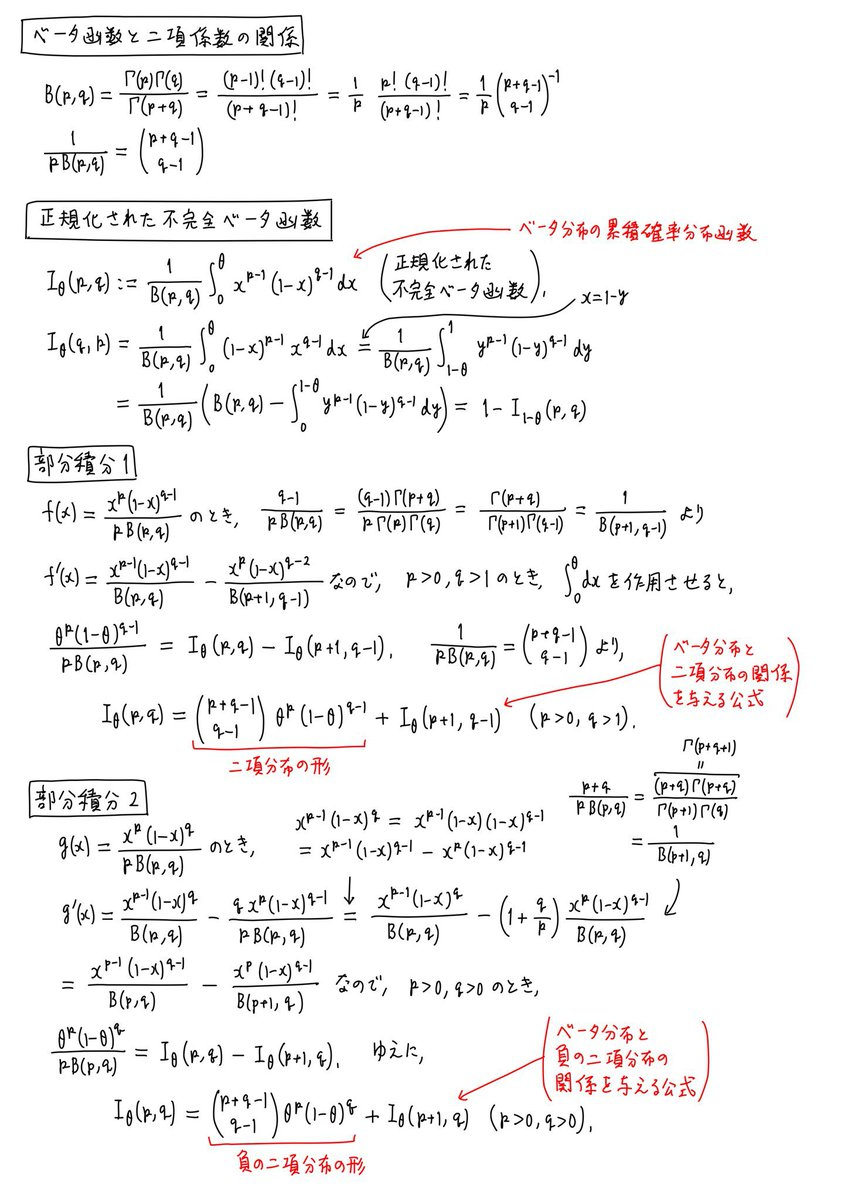

In [2]:
showimg("image/jpeg", "IMG_2889.jpg"; tag="img width=70%")


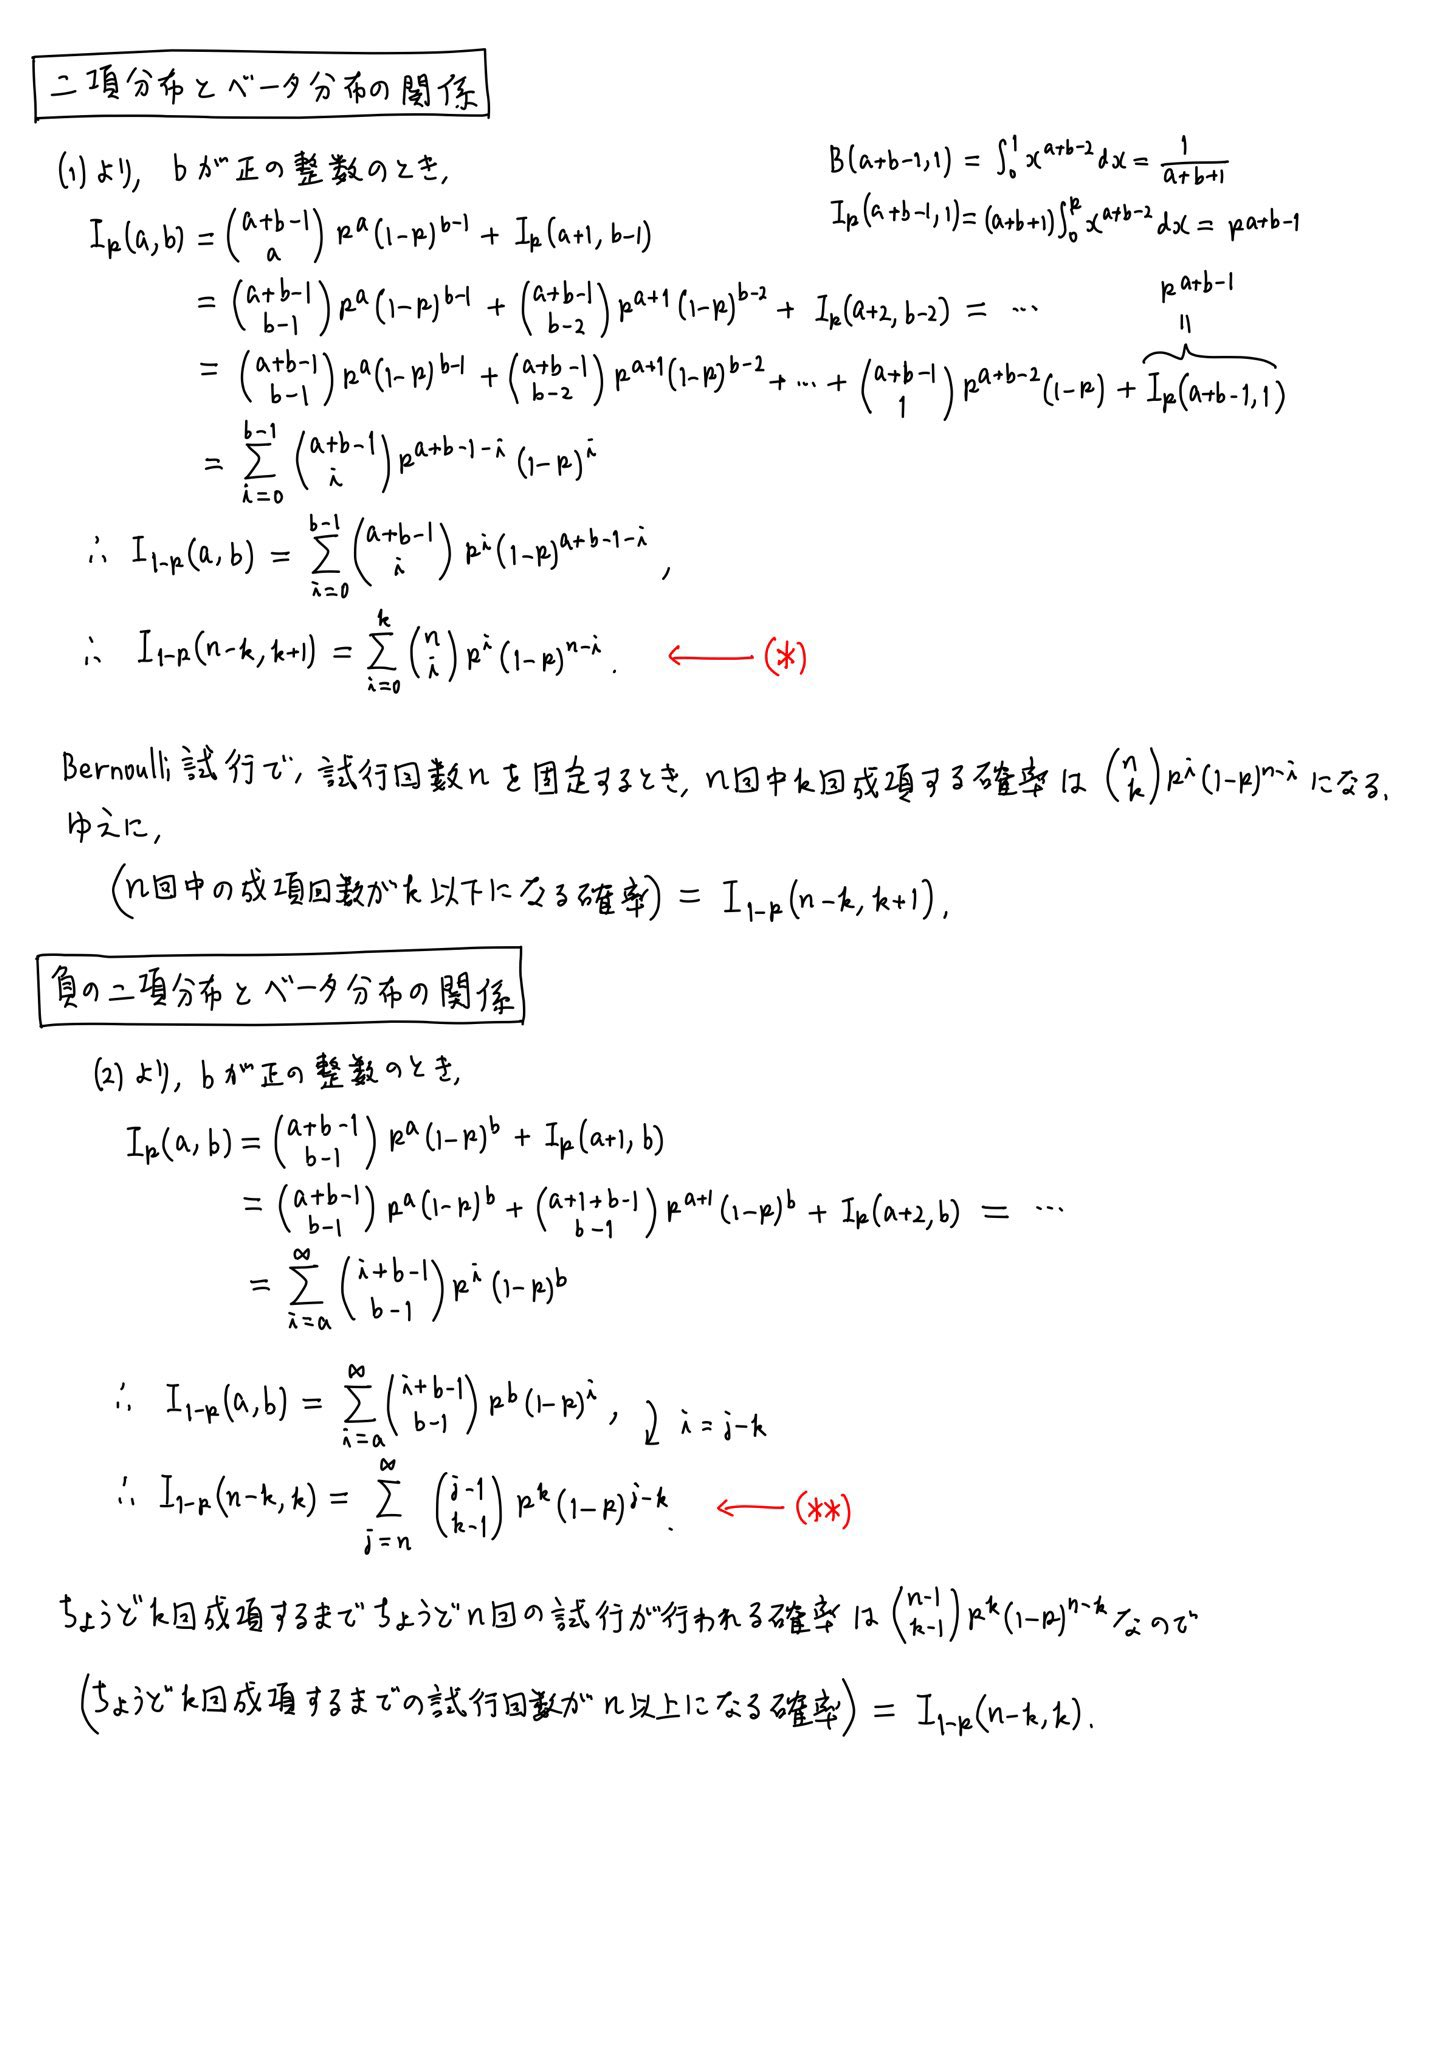

In [3]:
showimg("image/jpeg", "IMG_2890.jpg"; tag="img width=70%")

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#正規分布による近似" data-toc-modified-id="正規分布による近似-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>正規分布による近似</a></span></li><li><span><a href="#P値の比較" data-toc-modified-id="P値の比較-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>P値の比較</a></span></li><li><span><a href="#P値函数の比較(プロット)" data-toc-modified-id="P値函数の比較(プロット)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>P値函数の比較(プロット)</a></span></li></ul></div>

In [4]:
using Distributions

using StatsPlots
default(titlefontsize=11, tickfontsize=7)
#pyplot(fmt=:svg)
gr(lw=1.5)

# probability mass functions
P(k, n, θ) = pdf(Binomial(n, θ), k)
Q(n, k, θ) = pdf(NegativeBinomial(k, θ), n-k)

# P-value functions of the binomial and the negative-binomial one-sided tests
pval_binomi(n, k, θ) = cdf(Binomial(n, θ), k)
pval_negbin(n, k, θ) = k > 0 ? ccdf(NegativeBinomial(k, θ), (n-1)-k) : 0.0

# Bayesian version, prior = Beta(a, b)
pval_Bayesi(n, k, θ; a=1.0, b=1.0) = ccdf(Beta(k+a, n-k+b), θ)

# P-value function of the one-sided likelihood ration test
⪅(x, y) = x < y || x ≈ y
xlogy(x, y) = iszero(x) ? x*y : x*log(y)
loglik(n, k, θ) = xlogy(k, θ) + xlogy(n - k, 1 - θ)
loglikrat(n, k, θ) = 2(loglik(n, k, k/n) - loglik(n, k, θ))
pval_likrat(n, k, θ) = k/n ⪅ θ ?
    ccdf(Chisq(1), loglikrat(n, k, θ))/2 :
    1 - ccdf(Chisq(1), loglikrat(n, k, θ))/2

pval_likrat (generic function with 1 method)

## 正規分布による近似

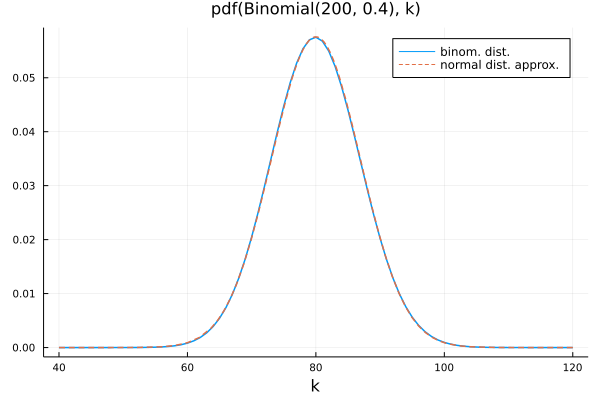

In [5]:
θ = 0.4
n = 200
k = 40:120
plot(k, P.(k, n, θ); label="binom. dist.")
plot!(Normal(n*θ, √(n*θ*(1-θ))), extrema(k)...; label="normal dist. approx.", ls=:auto)
plot!(title="pdf(Binomial($n, $θ), k)", xlabel="k")

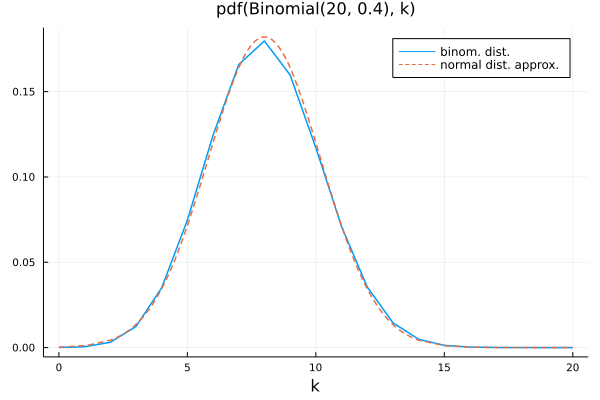

In [6]:
θ = 0.4
n = 20
k = 0:20
plot(k, P.(k, n, θ); label="binom. dist.")
plot!(Normal(n*θ, √(n*θ*(1-θ))), extrema(k)...; label="normal dist. approx.", ls=:auto)
plot!(title="pdf(Binomial($n, $θ), k)", xlabel="k")

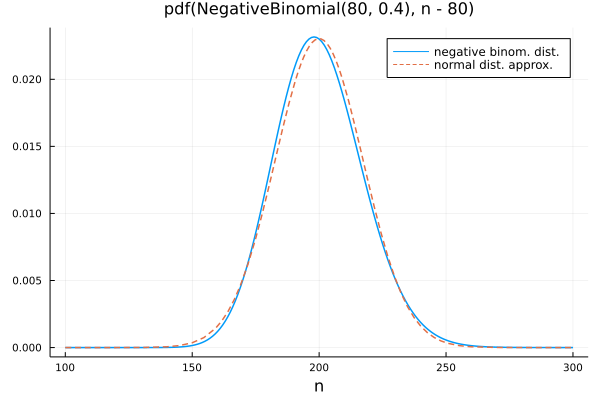

In [7]:
θ = 0.4
k = 80
n = 100:300
plot(n, Q.(n, k, θ); label="negative binom. dist.")
plot!(Normal(k/θ, √(k*(1-θ)/θ^2)), extrema(n)...; label="normal dist. approx.", ls=:auto)
plot!(title="pdf(NegativeBinomial($k, $θ), n - $k)", xlabel="n")

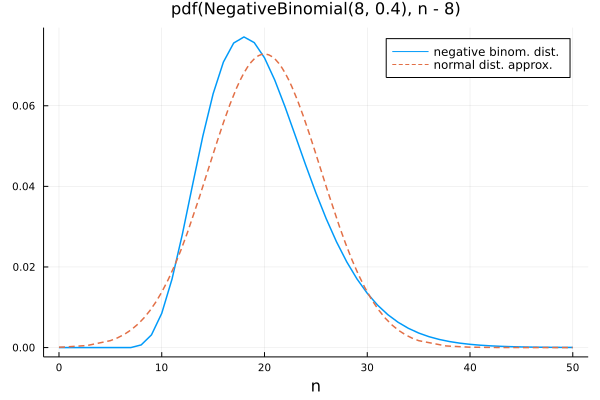

In [8]:
θ = 0.4
k = 8
n = 0:50
plot(n, Q.(n, k, θ); label="negative binom. dist.")
plot!(Normal(k/θ, √(k*(1-θ)/θ^2)), extrema(n)...; label="normal dist. approx.", ls=:auto)
plot!(title="pdf(NegativeBinomial($k, $θ), n - $k)", xlabel="n")

## P値の比較

In [9]:
# 2通りの計算法の一致の確認

θ = 0.5
n = 12
k = 3
∞ = 10^6
@show sum(P(j, n, θ) for j in 0:k)
@show pval_binomi(n, k, θ)
println()
@show sum(Q(m, k, θ) for m in n:∞)
@show pval_negbin(n, k, θ)
println()
@show pval_Bayesi(n, k, θ; a=1.0, b=0.0)
@show pval_Bayesi(n, k, θ; a=0.0, b=0.0)
@show pval_Bayesi(n, k, θ; a=0.5, b=0.5)
@show pval_Bayesi(n, k, θ; a=1.0, b=1.0)
println()
@show loglikrat(n, k, θ)
@show pval_likrat(n, k, θ)
;

sum((P(j, n, θ) for j = 0:k)) = 0.07299804687500008
pval_binomi(n, k, θ) = 0.07299804687500007

sum((Q(m, k, θ) for m = n:∞)) = 0.03271484375000004
pval_negbin(n, k, θ) = 0.03271484375000003

pval_Bayesi(n, k, θ; a = 1.0, b = 0.0) = 0.07299804687500007
pval_Bayesi(n, k, θ; a = 0.0, b = 0.0) = 0.03271484375000003
pval_Bayesi(n, k, θ; a = 0.5, b = 0.5) = 0.03944464950045748
pval_Bayesi(n, k, θ; a = 1.0, b = 1.0) = 0.046142578125000014

loglikrat(n, k, θ) = 3.139488862587287
pval_likrat(n, k, θ) = 0.03820887637173434


In [10]:
θ = 0.5
n = 12
[pval_Bayesi(n, k, θ; a=1.0, b=0.0) - pval_binomi(n, k, θ) for k in 1:11]

11-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [11]:
θ = 0.5
n = 12
[pval_Bayesi(n, k, θ; a=0.0, b=0.0) - pval_negbin(n, k, θ) for k in 1:11]

11-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [12]:
θ = 0.5
n = 12
k = round(Int, n*θ - 1.732*√(n*θ*(1-θ)))
@show pval_binomi(n, k, θ)
@show pval_negbin(n, k, θ)
@show pval_Bayesi(n, k, θ)
@show pval_likrat(n, k, θ)
;

pval_binomi(n, k, θ) = 0.07299804687500007
pval_negbin(n, k, θ) = 0.03271484375000003
pval_Bayesi(n, k, θ) = 0.046142578125000014
pval_likrat(n, k, θ) = 0.03820887637173434


In [13]:
θ = 0.5
n = 120
k = round(Int, n*θ - 1.732*√(n*θ*(1-θ)))
@show pval_binomi(n, k, θ)
@show pval_negbin(n, k, θ)
@show pval_Bayesi(n, k, θ)
@show pval_likrat(n, k, θ)
;

pval_binomi(n, k, θ) = 0.06016391386932899
pval_negbin(n, k, θ) = 0.04926181370112871
pval_Bayesi(n, k, θ) = 0.05068382676654617
pval_likrat(n, k, θ) = 0.049853706334152474


In [14]:
θ = 0.5
n = 1200
k = round(Int, n*θ - 1.732*√(n*θ*(1-θ)))
@show pval_binomi(n, k, θ)
@show pval_negbin(n, k, θ)
@show pval_Bayesi(n, k, θ)
@show pval_likrat(n, k, θ)
;

pval_binomi(n, k, θ) = 0.04424585133812424
pval_negbin(n, k, θ) = 0.04154657044451643
pval_Bayesi(n, k, θ) = 0.04167510762992633
pval_likrat(n, k, θ) = 0.041600118672078336


In [15]:
θ = 0.5
n = 12000
k = round(Int, n*θ - 1.732*√(n*θ*(1-θ)))
@show pval_binomi(n, k, θ)
@show pval_negbin(n, k, θ)
@show pval_Bayesi(n, k, θ)
@show pval_likrat(n, k, θ)
;

pval_binomi(n, k, θ) = 0.04223223140525323
pval_negbin(n, k, θ) = 0.04141016156435489
pval_Bayesi(n, k, θ) = 0.041422974794032515
pval_likrat(n, k, θ) = 0.04141550032008437


## P値函数の比較(プロット)

In [16]:
function plot_pvals(; θ = 0.5, n = 12)
    s = round(Int, 4*√(n*θ*(1-θ)))
    m = round(Int, n*θ)

    k = max(0, m-s):min(n, m+s)
    xmin, xmax = extrema(k)
    xtick = xmin:max(1, round(Int, (xmax - xmin)/20)):xmax
    P1 = plot(; title="One-sided test P-values for n = $n,  θ = $θ")
    plot!(; xlabel="k", ylabel="P-value")
    plot!(; xtick=xtick, ytick=0:0.05:1)
    plot!(k, pval_binomi.(n, k, θ); label="binomial dist. model")
    plot!(k, pval_negbin.(n, k, θ); label="negative binom. dist. model", ls=:dash)
    #plot!(k, pval_likrat.(n, k, θ); label="likelihood ratio test", ls=:dashdot)
    plot!(k, pval_Bayesi.(n, k, θ); label="Bayesian ver. for the flat prior", ls=:dot, lw=2)
    plot!(; legend=:topleft)

    k = max(0, m-s):max(0, ceil(Int, m-s/2))
    P2 = plot(; title="One-sided test P-values for n = $n,  θ = $θ")
    plot!(; xlabel="k", ylabel="P-value")
    plot!(k, pval_binomi.(n, k, θ); label="binomial dist. model")
    plot!(k, pval_negbin.(n, k, θ); label="negative binom. dist. model", ls=:dash)
    #plot!(k, pval_likrat.(n, k, θ); label="likelihood ratio test", ls=:dashdot)
    plot!(k, pval_Bayesi.(n, k, θ); label="Bayesian ver. for the flat prior", ls=:dot, lw=2)
    plot!(; legend=:topleft)

    plot(P1, P2; size=(640, 800), layout=(2, 1))
end

plot_pvals (generic function with 1 method)

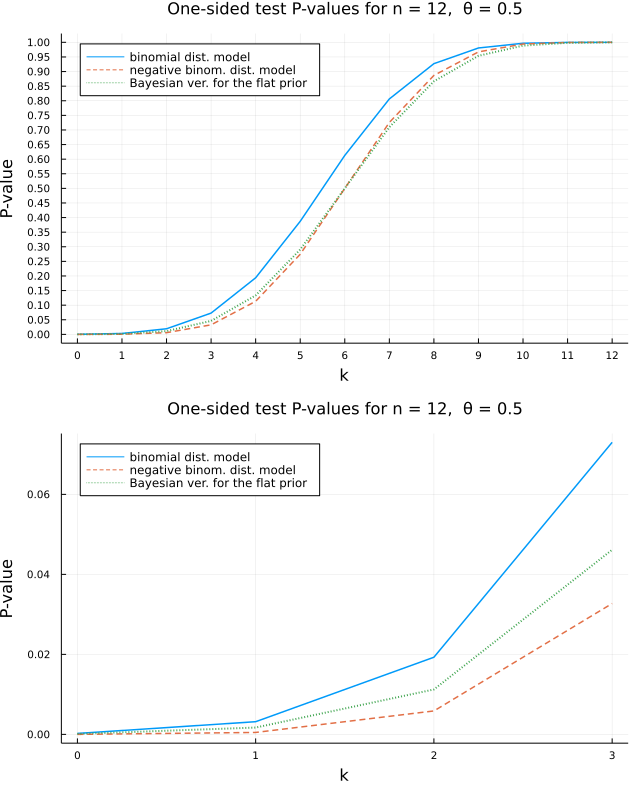

In [17]:
plot_pvals(θ = 0.5, n = 12)

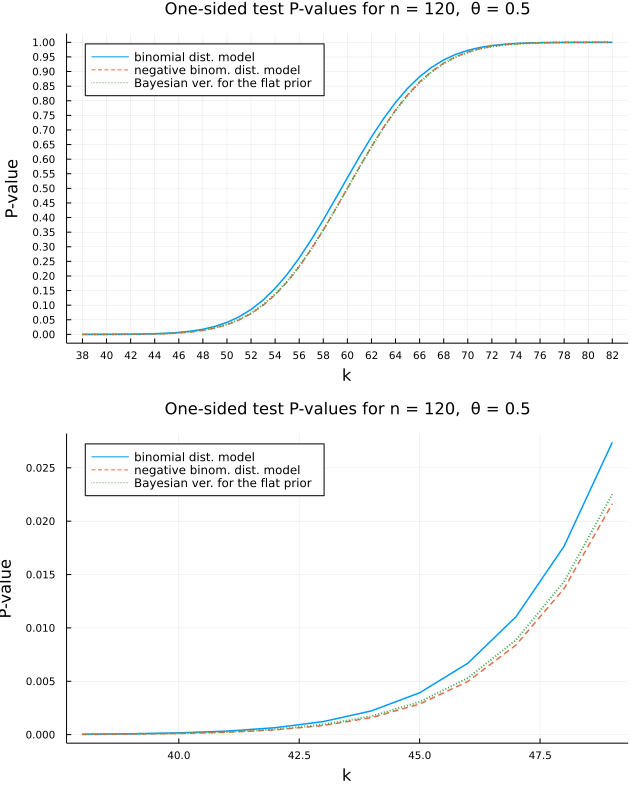

In [18]:
plot_pvals(θ = 0.5, n = 120)

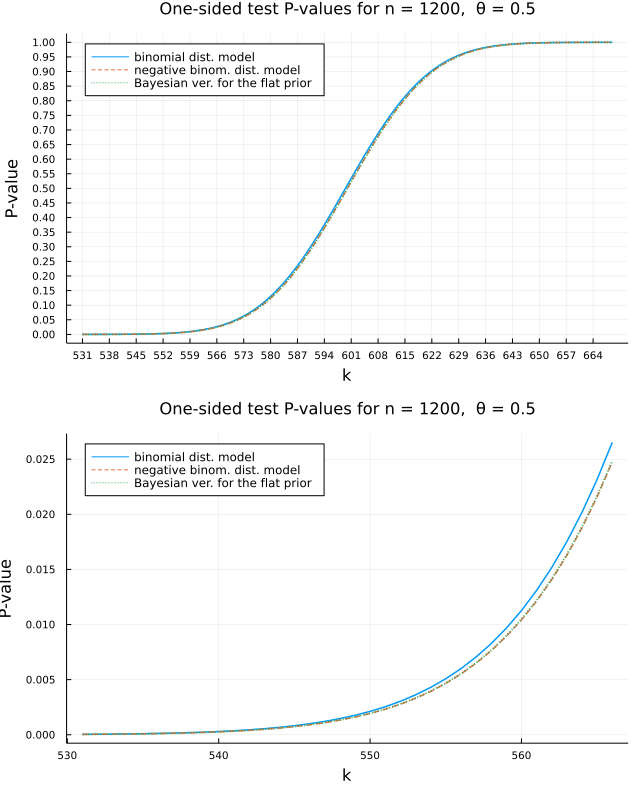

In [19]:
plot_pvals(θ = 0.5, n = 1200)

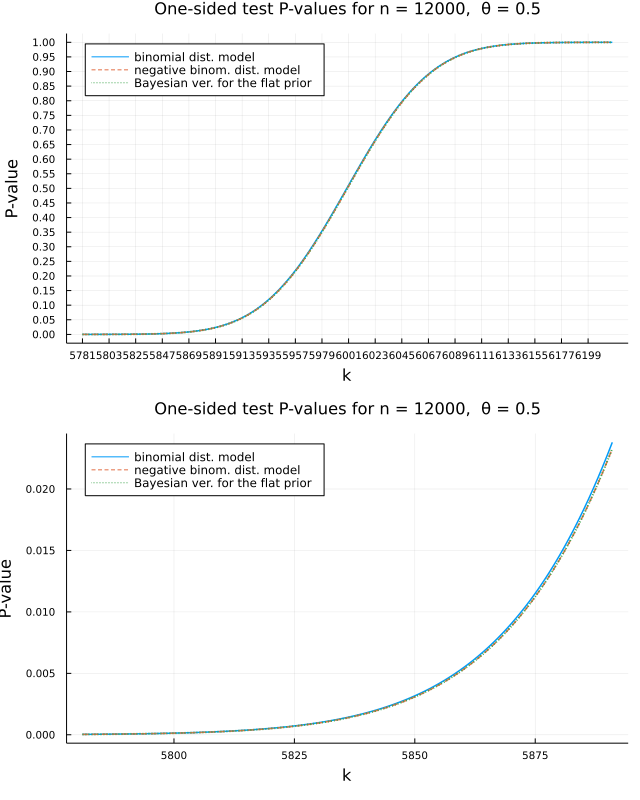

In [20]:
plot_pvals(θ = 0.5, n = 12000)